# The simple model 6
Был использован GridSearchCV для посика наилучших параметров cv = 7

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge

!pip install matminer;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
data = pd.read_csv('3DSC_MP.csv', header = 1)
data1 = data.loc[data['tc'] < 10.0]
data1 = data1.loc[data1['tc'] > 0.0]
data_t = data1[['tc']]
data2 = data1[['formula_sc']]
data2

,formula_sc
0,Ag0.02Ge2Pd1.98Sr1
1,Ag0.15Sn0.85Te1
2,Ag0.1Ge2Pd1.9Sr1
3,Ag0.1In0.9Te1
4,Ag0.2Ba1Si1.8
...,...
5766,W2Zr1
5767,W3O1
5770,Zn1
5771,Zn2Zr1


In [14]:
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.conversions import StrToComposition
ep_feat = ElementProperty.from_preset(preset_name="magpie")
d = {"element": np.array(data2)[:, 0]}
df = pd.DataFrame(d)

df = StrToComposition().featurize_dataframe(df, "element")
df = ep_feat.featurize_dataframe(df, col_id = 'composition')

StrToComposition:   0%|          | 0/2588 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2588 [00:00<?, ?it/s]

In [13]:
pd.set_option('display.max_columns', 200)
df

,element,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ag0.02Ge2Pd1.98Sr1,"(Ag, Ge, Pd, Sr)",32.0,47.0,15.0,38.804000,5.764800,32.0,8.0,79.0,71.0,58.012000,20.004800,79.0,72.6400,107.8682,35.2282,89.153793,13.824551,72.6400,1050.00,1828.05,778.05,1423.407520,3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['MagpieData mean AtomicWeight', 'MagpieData mean MeltingT',
'MagpieData mean Electronegativity', 'MagpieData mean NdValence', 'MagpieData mean GSvolume_pa', 'MagpieData mean SpaceGroupNumber', 'MagpieData mean NdUnfilled']], data_t, test_size=0.3, random_state=85)

param_grid = { 
            "n_estimators"      : [30, 100, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
rfr = RandomForestRegressor()
CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 7)
CV_rfr.fit(X_train, y_train)

In [27]:
CV_rfr.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 300}

In [45]:
rfr1 = RandomForestRegressor(max_features = 'sqrt', min_samples_split = 4, bootstrap = False, n_estimators = 300)
rfr1.fit(X_train, y_train)
predictions = rfr1.predict(X_test)
predictions1 = rfr1.predict(X_train)

<ipython-input-45-c9863f65d2e4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(X_train, y_train)


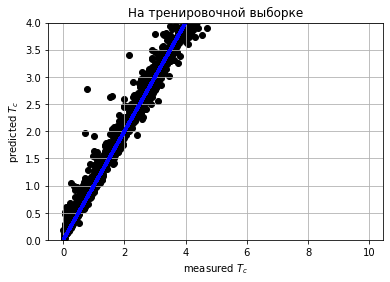

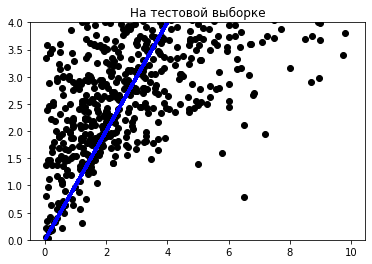

In [46]:
fig, ax = plt.subplots()
ax.grid()

plt.scatter(y_train, predictions1, color = 'black')
plt.plot(y_train, y_train, color = 'blue', linewidth = 3)
ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тренировочной выборке")
plt.ylim((0, 4))
plt.show()


plt.scatter(y_test, predictions, color = 'black')
plt.plot(y_test, y_test, color = 'blue', linewidth = 3)
ax.set_xlabel('measured $T_c$')
ax.set_ylabel('predicted $T_c$')
plt.title("На тестовой выборке")
plt.ylim((0, 4))
plt.show()